In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,996 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.family'] ="Malgun Gothic"
plt.rc('font', family='NanumBarunGothic')
import scipy.stats as stats

In [ ]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/통벤져스/데이터셋통합/dataset (2).csv" , index_col = 0)
weather = pd.read_csv("/content/drive/MyDrive/통벤져스/데이터셋통합/weather.csv")
data = pd.read_csv("/content/drive/MyDrive/통벤져스/데이터셋통합/통합3 (2).csv")

In [ ]:
# 결측치 비율 
weather.isna().sum() / 34263 

no              0.000000
stn_Code        0.000000
stn_Name        0.000000
date            0.000000
temp            0.000146
max_Temp        0.000146
min_Temp        0.001051
hum             0.021744
widdir          0.104252
wind            0.000000
rain            0.000233
sun_Time        0.313049
sun_Qy          0.019058
condens_Time    0.182734
gr_Temp         0.448530
soil_Temp       0.136532
soil_Wt         0.496541
dtype: float64

결측치 비율 10프로 이하 인것만 합치기
- temp , max_temp , min_temp , hum, wind, rain, sun_qy

In [ ]:
w = weather[['stn_Name','date','temp','max_Temp','min_Temp','hum','wind','rain','sun_Qy']]
w

,stn_Name,date,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy
0,해남군 옥천면,2015-01-01,-1.3,0.6,-2.9,80.0,2.3,0.8,7.8
1,천안시 목천읍,2015-01-01,-6.2,-3.8,-8.3,NaN,0.0,0.0,NaN
2,밀양시 상남면,2015-01-01,-3.2,0.2,-7.2,40.1,2.9,0.0,11.0
3,진도군 군내면,2015-01-01,-0.8,1.6,-2.8,79.2,3.5,1.5,8.2
4,남원시 이백면,2015-01-01,-4.1,-1.3,-6.0,60.7,2.1,0.5,7.7
...,...,...,...,...,...,...,...,...,...
34258,남원시 이백면,2020-12-31,-2.6,-0.3,-5.8,74.6,1.0,0.0,9.7
34259,무안군 청계면,2020-12-31,-3.7,0.9,-8.3,95.3,1.5,1.0,8.2
34260,천안시 목천읍,2020-12-31,-9.9,-4.2,-16.4,70.3,0.1,0.5,30.4
34261,철원군 동송읍,2020-12-31,-11.2,-5.5,-16.9,43.0,2.3,0.0,8.3


In [ ]:
d = data[['date', '요일','품목','가격','거래량','주산지']]
d

,date,요일,품목,가격,거래량,주산지
0,2016-01-01,금요일,배추,0.0,0.0,전남
1,2016-01-02,토요일,배추,329.0,80860.0,전남
2,2016-01-03,일요일,배추,0.0,0.0,전남
3,2016-01-04,월요일,배추,478.0,1422742.5,전남
4,2016-01-05,화요일,배추,442.0,1167241.0,전남
...,...,...,...,...,...,...
36388,2020-09-24,목요일,샤인마스캇,10940.0,283196.9,경북
36389,2020-09-25,금요일,샤인마스캇,10844.0,303779.6,경북
36390,2020-09-26,토요일,샤인마스캇,10636.0,313295.7,경북
36391,2020-09-27,일요일,샤인마스캇,10699.0,9734.0,경북


날씨 데이터 지역을 주산지 기준으로 합치기
- 해남군 옥천면 -> 전남
- 천안시 목천읍 -> 충남
- 밀양시 상남면 -> 경남
- 진도군 군내면 -> 전남
- 남원시 이백면 -> 전북
- 시흥시 하중동 -> 경기 
- 상주시 초산동 -> 경북
- 창녕군 대지면 -> 경남
- 부산시 강서구 -> 부산
- 포천시 신북면 -> 경기
- 철원군 동송읍 -> 강원 
- 청도군 화양읍 -> 경북
- 진주시 초전동 -> 경남
- 무안군 청계면 -> 전남
- 상주시 공성면 -> 경북
- 제주시 애월읍 -> 제주

In [ ]:
# 주산지

def get_region(x):
    region = ''
    if (x == '해남군 옥천면') or (x == '진도군 군내면') or (x == '무안군 청계면')  :
        region = '전남'
    elif (x == '제주시 애월읍') :
        region = '제주'
    elif (x == '밀양시 상남면') or (x == '창녕군 대지면') or (x == '진주시 초전동') :
        region = '경남' 
    elif (x == '시흥시 하중동') or (x == '포천시 신북면') :
        region = '경기'
    elif (x == '철원군 동송읍') :
        region = '강원'
    elif (x == '천안시 목천읍') :
        region = '충남' 
    elif (x == '상주시 초산동') or (x == '청도군 화양읍') or (x == '상주시 공성면') :
        region = '경북' 
    elif (x == '부산시 강서구') :
        region = '부산'
    elif (x == '남원시 이백면') :
        region = '전북'
    else:
        region = ''
    return region

In [ ]:
w['주산지'] = w['stn_Name'].apply(lambda x: get_region(x)).astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ww = w.groupby(['주산지','date'])[['temp','max_Temp','min_Temp','hum','wind','rain','sun_Qy']].mean().reset_index()
ww['dif_Temp'] = ww['max_Temp'] - ww['min_Temp']
ww

,주산지,date,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp
0,강원,2015-01-01,-8.5,-5.7,-10.7,56.5,3.0,0.0,11.3,5.0
1,강원,2015-01-02,-8.0,-2.8,-12.5,66.5,2.0,0.0,11.4,9.7
2,강원,2015-01-03,-6.4,1.1,-15.5,76.4,1.5,0.0,11.0,16.6
3,강원,2015-01-04,0.5,5.2,-4.9,91.8,1.1,0.0,6.2,10.1
4,강원,2015-01-05,-0.7,6.2,-6.9,91.8,0.5,1.0,7.5,13.1
...,...,...,...,...,...,...,...,...,...,...
19705,충남,2020-12-27,1.7,8.3,-3.7,81.3,0.1,0.0,14.0,12.0
19706,충남,2020-12-28,3.6,11.1,-1.9,76.6,0.1,0.0,13.3,13.0
19707,충남,2020-12-29,0.0,3.6,-4.7,88.2,0.4,0.0,1.5,8.3
19708,충남,2020-12-30,-9.2,-4.6,-12.5,74.5,0.9,0.0,26.6,7.9


## 기후데이터 EDA

In [ ]:
df = pd.merge(d, ww , on = ['date','주산지'], how = 'left')

In [ ]:
# date -> 년, 월, 일로 변환

time = pd.to_datetime(df.date)
df['year'] = time.dt.year
df['month'] = time.dt.month
df['day'] = time.dt.day
df

,date,요일,품목,가격,거래량,주산지,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp,year,month,day
0,2016-01-01,금요일,배추,0.0,0.0,전남,2.700000,9.300000,-3.300000,84.133333,0.366667,0.033333,9.033333,12.600000,2016,1,1
1,2016-01-02,토요일,배추,329.0,80860.0,전남,6.133333,13.800000,0.233333,86.900000,0.333333,0.000000,5.933333,13.566667,2016,1,2
2,2016-01-03,일요일,배추,0.0,0.0,전남,6.666667,15.233333,2.133333,89.800000,0.333333,0.000000,9.633333,13.100000,2016,1,3
3,2016-01-04,월요일,배추,478.0,1422742.5,전남,6.133333,11.233333,-0.633333,81.233333,1.100000,0.000000,9.800000,11.866667,2016,1,4
4,2016-01-05,화요일,배추,442.0,1167241.0,전남,1.700000,4.066667,-1.300000,76.566667,0.400000,1.466667,1.900000,5.366667,2016,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36388,2020-09-24,목요일,샤인마스캇,10940.0,283196.9,경북,18.500000,24.133333,13.500000,76.800000,0.500000,0.000000,12.466667,10.633333,2020,9,24
36389,2020-09-25,금요일,샤인마스캇,10844.0,303779.6,경북,18.300000,25.100000,12.533333,78.200000,0.400000,0.000000,12.866667,12.566667,2020,9,25
36390,2020-09-26,토요일,샤인마스캇,10636.0,313295.7,경북,17.500000,25.000000,11.700000,76.033333,0.433333,0.000000,17.233333,13.300000,2020,9,26
36391,2020-09-27,일요일,샤인마스캇,10699.0,9734.0,경북,17.600000,25.033333,11.200000,74.866667,0.466667,0.000000,18.000000,13.833333,2020,9,27


In [ ]:
# remove outlier (주말에 0값이 많음)
tmp_df = df[(df['요일']!='토요일') & (df['요일']!='일요일')]

In [ ]:
# vegetable
np.unique(df['품목'].values)

array(['건고추', '깻잎', '당근', '대파', '마늘', '무', '미나리', '배추', '백다다기', '새송이',
       '샤인마스캇', '시금치', '애호박', '양배추', '양파', '얼갈이배추', '청상추', '캠벨얼리', '토마토',
       '파프리카', '팽이버섯'], dtype=object)

In [ ]:
vegatable = '건고추'
group = 'month'

건고추


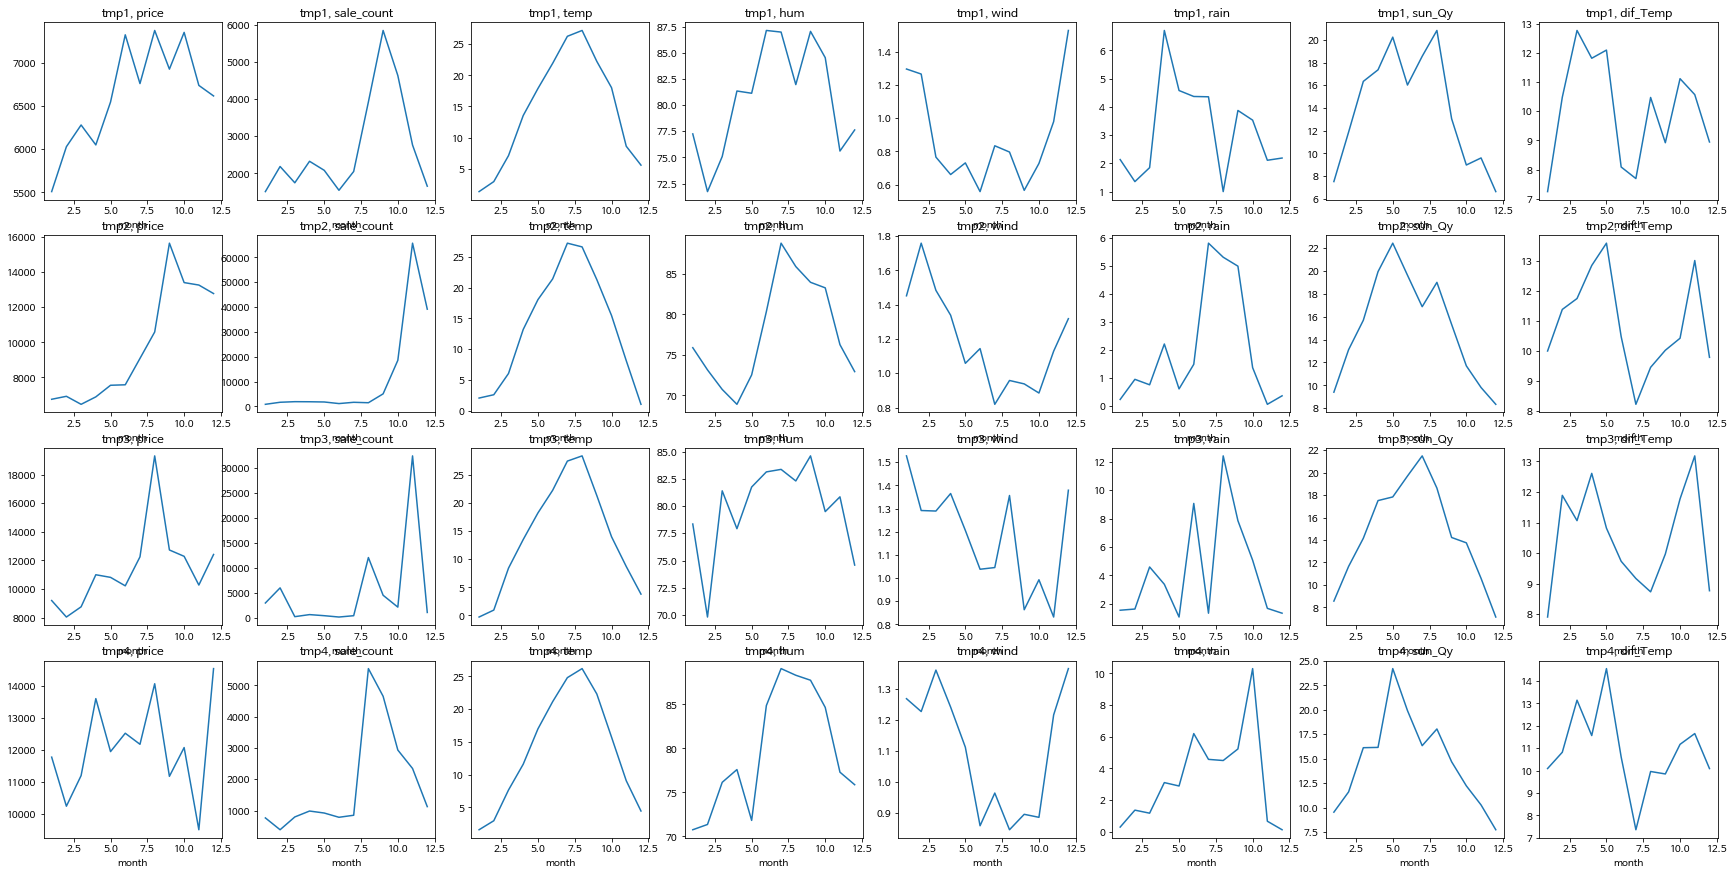

In [ ]:
one_df = tmp_df[tmp_df['품목']==vegatable]

tmp1 = one_df[one_df['year']==2016].groupby(group)[['가격', '거래량', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']].mean()
tmp2 = one_df[one_df['year']==2017].groupby(group)[['가격', '거래량', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']].mean()
tmp3 = one_df[one_df['year']==2018].groupby(group)[['가격', '거래량', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']].mean()
tmp4 = one_df[one_df['year']==2019].groupby(group)[['가격', '거래량', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']].mean()

tmp1.columns = ['price', 'sale_count', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']
tmp2.columns = ['price', 'sale_count', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']
tmp3.columns = ['price', 'sale_count', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']
tmp4.columns = ['price', 'sale_count', 'temp', 'hum', 'wind', 'rain', 'sun_Qy','dif_Temp']

print(vegatable)

fig = plt.figure(figsize=(30,15))

tmp_ax1 = [0]*8
for i in range(8):
  tmp_ax1[i] = fig.add_subplot(4, 8, i+1)
  tmp_ax1[i].set_title(f'tmp1, {tmp1.columns[i]}')
  tmp1[tmp1.columns[i]].plot()

tmp_ax2 = [0]*8
for i in range(8):
  tmp_ax2[i] = fig.add_subplot(4, 8, i+9)
  tmp_ax2[i].set_title(f'tmp2, {tmp2.columns[i]}')
  tmp2[tmp2.columns[i]].plot()

tmp_ax3 = [0]*8
for i in range(8):
  tmp_ax3[i] = fig.add_subplot(4, 8, i+17)
  tmp_ax3[i].set_title(f'tmp3, {tmp3.columns[i]}')
  tmp3[tmp3.columns[i]].plot()

tmp_ax4 = [0]*8
for i in range(8):
  tmp_ax4[i] = fig.add_subplot(4, 8, i+25)
  tmp_ax4[i].set_title(f'tmp4, {tmp4.columns[i]}')
  tmp4[tmp4.columns[i]].plot()


## 기후데이터의 상관계수

> '배추', '양파', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치','미나리', '당근', '파프리카', '새송이', '팽이버섯', '토마토', '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇' ,'건고추','무'


In [ ]:
# veget 품목을 다르게 해서 보기
veget = '배추'
vg = df[df['품목'] == veget]
vg

In [ ]:
vg.isna().sum()

date        0
요일          0
품목          0
가격          0
거래량         0
주산지         0
temp        2
max_Temp    2
min_Temp    2
hum         2
wind        2
rain        2
sun_Qy      2
dif_Temp    2
year        0
month       0
day         0
dtype: int64

In [ ]:
vg[vg['temp'].isnull()]

,date,요일,품목,가격,거래량,주산지,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp,year,month,day
59,2016-02-29,월요일,배추,755.0,978645.0,전남,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,2,29
1520,2020-02-29,토요일,배추,802.0,336694.4,전남,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,29


In [ ]:
vg[-vg['temp'].isnull()].corr()

,가격,거래량,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp,year,month,day
가격,1.000000,0.252535,0.162778,0.148967,0.170709,0.133518,-0.044027,0.086939,0.009153,-0.071330,0.011388,0.105659,0.018045
거래량,0.252535,1.000000,-0.005772,0.002178,-0.010479,0.006956,-0.064177,-0.021848,-0.131522,0.029460,-0.148552,0.435993,0.015925
temp,0.162778,-0.005772,1.000000,0.971480,0.974854,0.479031,-0.247319,0.170800,0.357965,-0.139796,0.015421,0.335194,0.009375
max_Temp,0.148967,0.002178,0.971480,1.000000,0.905751,0.399323,-0.352152,0.092270,0.483120,0.085830,0.004439,0.329302,0.015089
min_Temp,0.170709,-0.010479,0.974854,0.905751,1.000000,0.543822,-0.166175,0.220824,0.236402,-0.344507,0.018742,0.331457,0.003139
hum,0.133518,0.006956,0.479031,0.399323,0.543822,1.000000,-0.247493,0.354035,-0.356122,-0.393895,0.067698,0.227798,-0.018551
wind,-0.044027,-0.064177,-0.247319,-0.352152,-0.166175,-0.247493,1.000000,0.208873,-0.183902,-0.389400,0.142475,-0.170727,-0.033270
rain,0.086939,-0.021848,0.170800,0.092270,0.220824,0.354035,0.208873,1.000000,-0.325326,-0.314733,0.055790,0.057756,-0.029877
sun_Qy,0.009153,-0.131522,0.357965,0.483120,0.236402,-0.356122,-0.183902,-0.325326,1.000000,0.514417,0.038352,-0.102359,0.021410
dif_Temp,-0.071330,0.029460,-0.139796,0.085830,-0.344507,-0.393895,-0.389400,-0.314733,0.514417,1.000000,-0.034227,-0.049763,0.026043


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


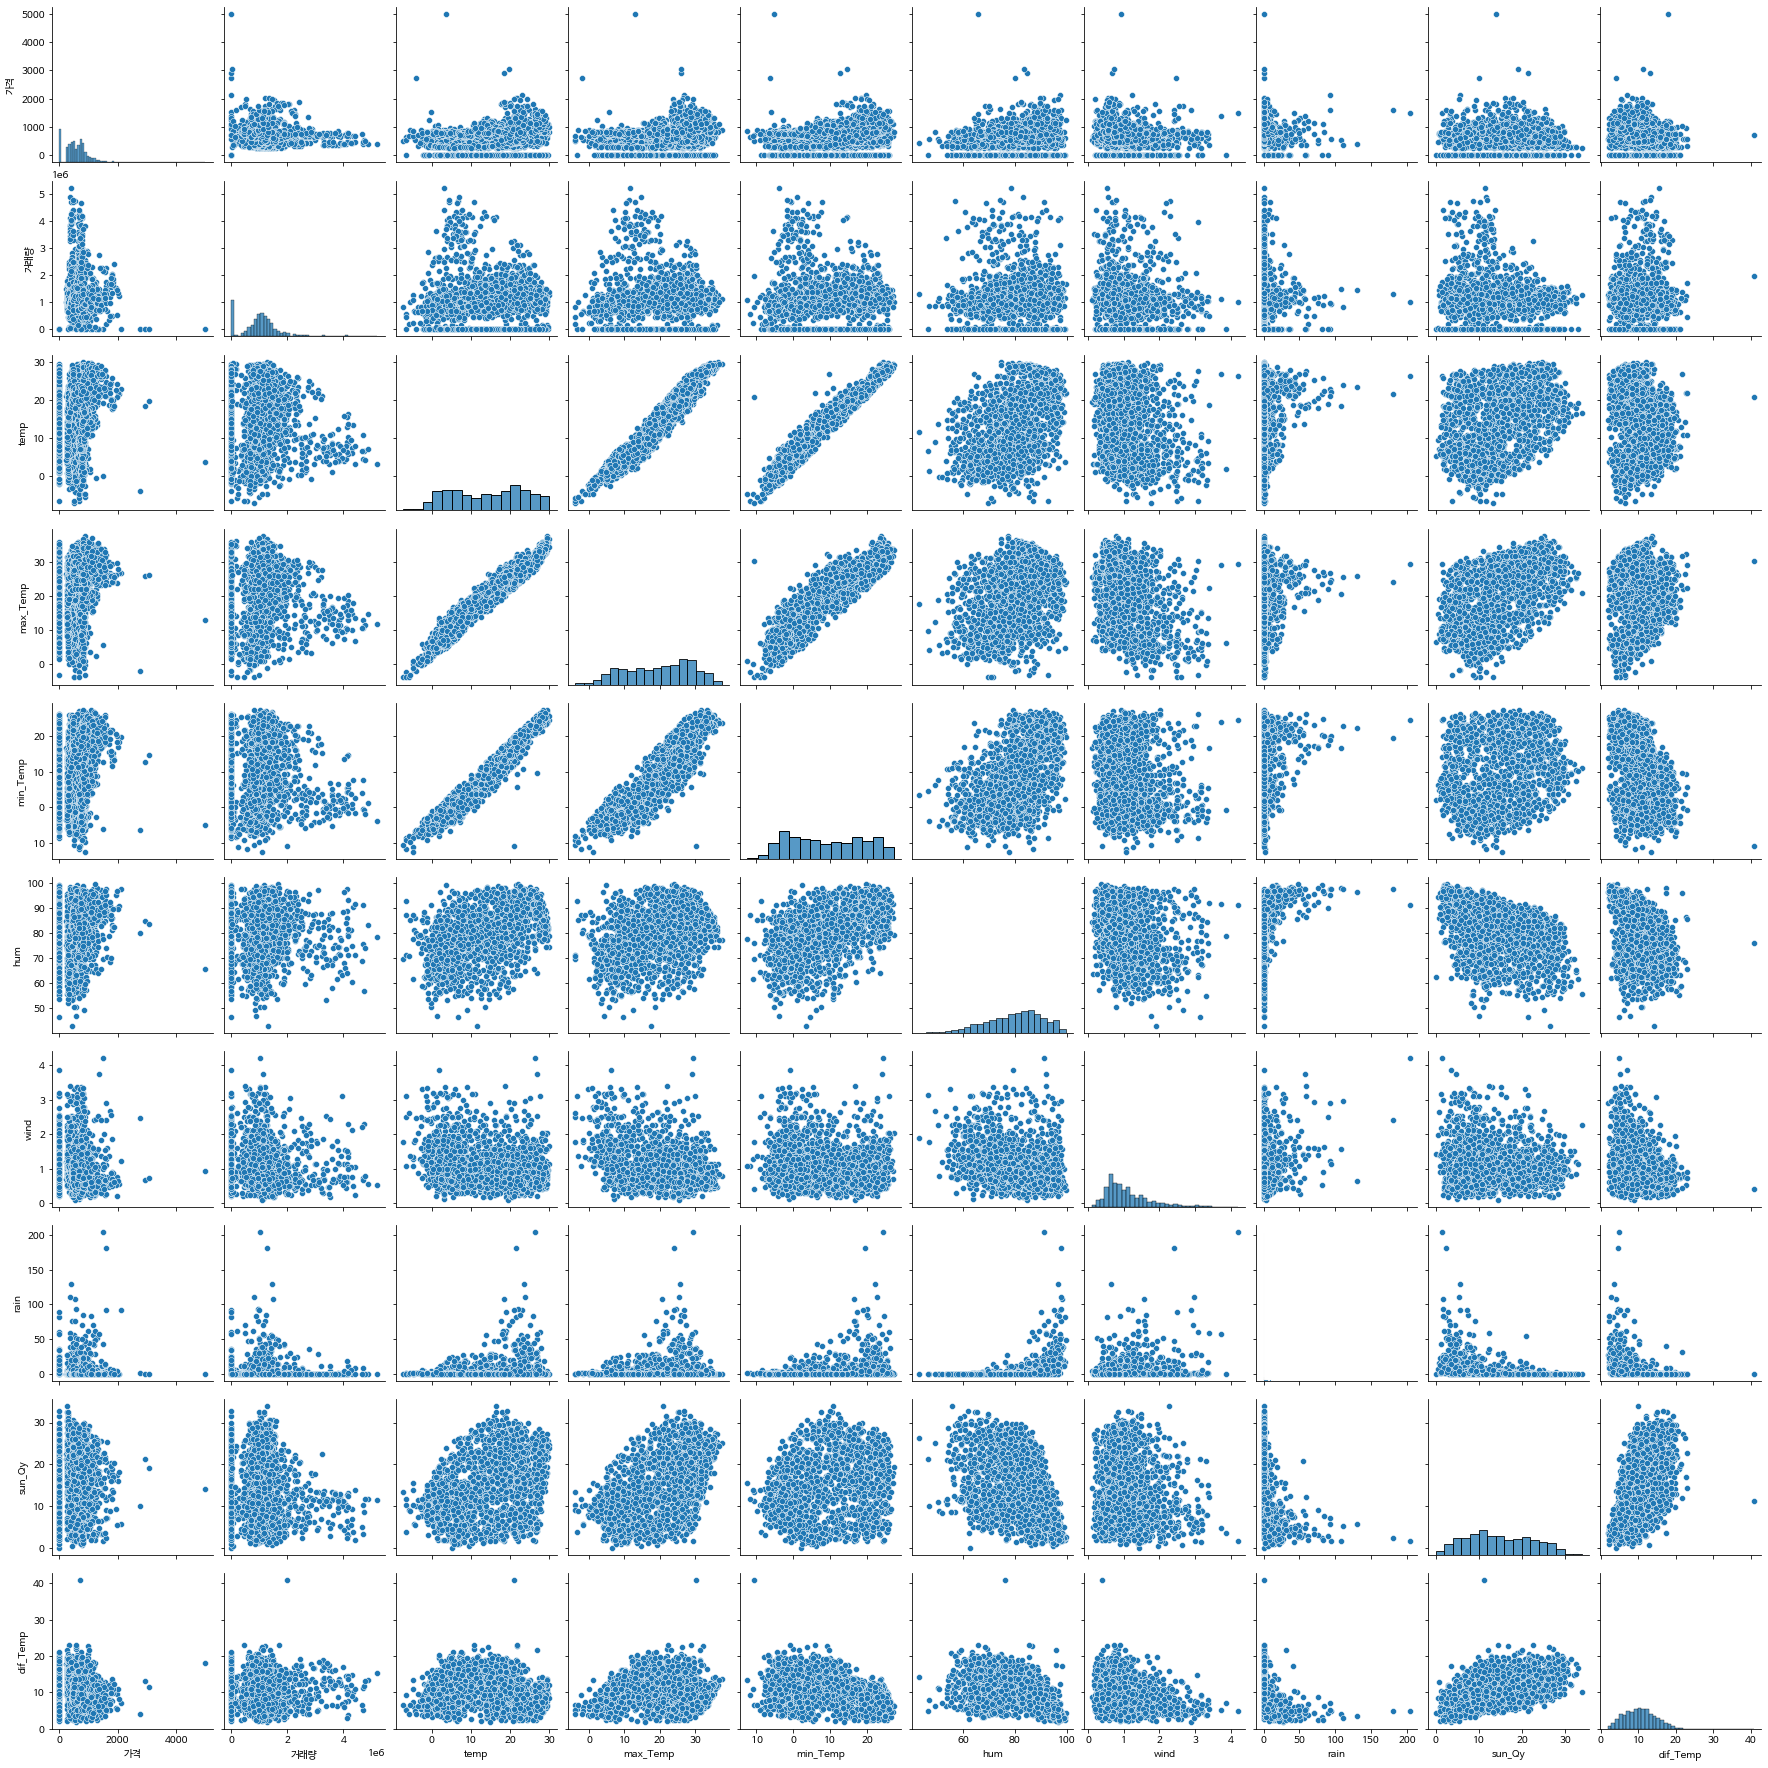

In [ ]:
sns.pairplot(vg[-vg['temp'].isnull()][['가격','거래량','temp','max_Temp','min_Temp','hum','wind','rain','sun_Qy','dif_Temp']], diag_kind = 'hist')

거래량


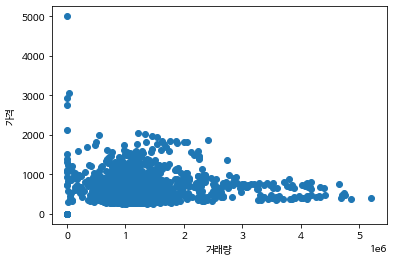

temp


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


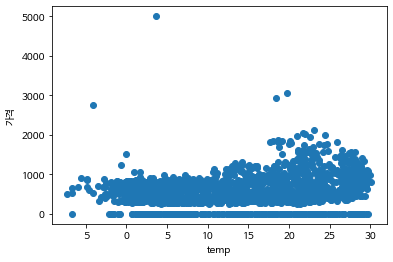

max_Temp


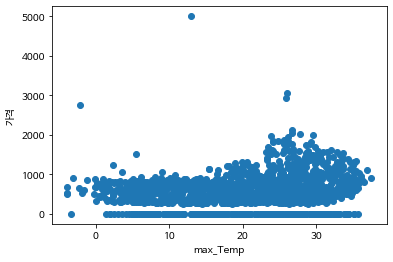

min_Temp


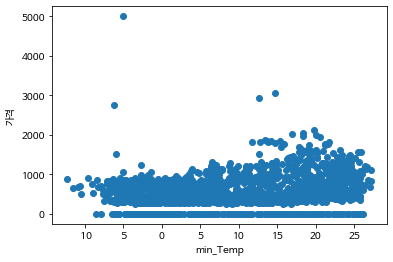

hum


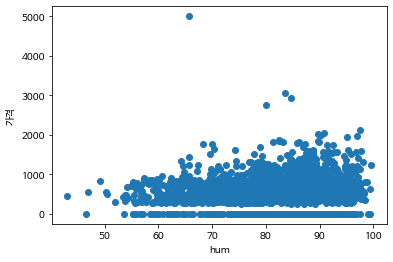

wind


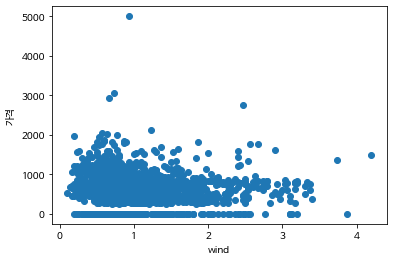

rain


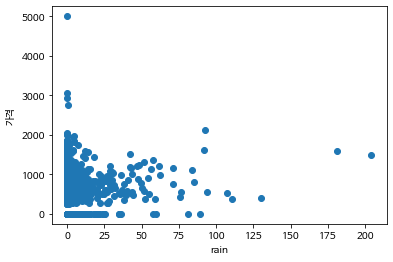

sun_Qy


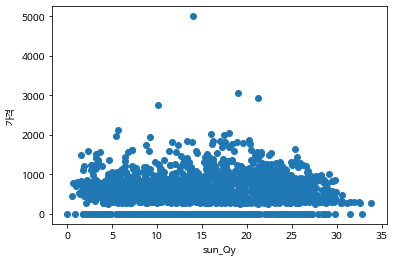

dif_Temp


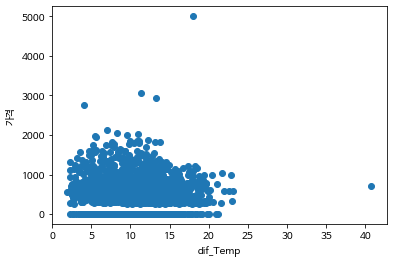

In [ ]:
col = ['거래량','temp','max_Temp','min_Temp','hum','wind','rain','sun_Qy','dif_Temp']

for i in range(len(col)):
  print(col[i])
  plt.scatter(x = vg[-vg['temp'].isnull()][col[i]] ,y = vg[-vg['temp'].isnull()]['가격'])
  plt.xlabel(col[i])
  plt.ylabel('가격')
  plt.show()
  i+=1

In [ ]:
n_vg = vg[-vg['temp'].isnull()]
t_vg = n_vg.groupby(['year','month'])[['가격','temp','max_Temp','min_Temp','hum','wind','rain','sun_Qy','dif_Temp']].mean().reset_index()
t_vg.corr()

,year,month,가격,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp
year,1.000000,-0.107662,0.022991,0.016864,0.005549,0.020651,0.120067,0.343784,0.250526,0.062509,-0.080181
month,-0.107662,1.000000,0.163673,0.357743,0.360539,0.359142,0.402644,-0.428520,0.263816,-0.163885,-0.116751
가격,0.022991,0.163673,1.000000,0.267833,0.254643,0.284399,0.391291,-0.301400,0.411909,-0.015826,-0.241794
temp,0.016864,0.357743,0.267833,1.000000,0.995527,0.995405,0.742314,-0.610692,0.693401,0.642186,-0.341730
max_Temp,0.005549,0.360539,0.254643,0.995527,1.000000,0.982421,0.698841,-0.614492,0.666912,0.685269,-0.252793
min_Temp,0.020651,0.359142,0.284399,0.995405,0.982421,1.000000,0.784817,-0.610562,0.716662,0.588297,-0.428964
hum,0.120067,0.402644,0.391291,0.742314,0.698841,0.784817,1.000000,-0.624242,0.773403,0.078943,-0.685932
wind,0.343784,-0.428520,-0.301400,-0.610692,-0.614492,-0.610562,-0.624242,1.000000,-0.474899,-0.195998,0.190954
rain,0.250526,0.263816,0.411909,0.693401,0.666912,0.716662,0.773403,-0.474899,1.000000,0.259667,-0.487199
sun_Qy,0.062509,-0.163885,-0.015826,0.642186,0.685269,0.588297,0.078943,-0.195998,0.259667,1.000000,0.266924


In [ ]:
# 품목별 가격과 feature들의 상관계수

test = pd.DataFrame(columns = ['temp','max_Temp','min_Temp','wind','rain','dif_Temp'])
veget = df.품목.unique()
name  = lambda x : x + " 가격"

for i in range(len(veget)):
  vg = df[df['품목'] == veget[i]]
  n_vg = vg[-vg['temp'].isnull()]
  t_vg = n_vg.groupby(['year','month'])[['가격','temp','max_Temp','min_Temp','hum','wind','rain','sun_Qy','dif_Temp']].mean().reset_index()
  t =t_vg.corr()
  test.loc[name(veget[i])] = t.iloc[2,3:]


test

,temp,max_Temp,min_Temp,wind,rain,dif_Temp
배추 가격,0.267833,0.254643,0.284399,-0.301400,0.411909,-0.241794
무 가격,-0.033426,-0.045550,-0.013194,-0.015441,0.184418,-0.160946
양파 가격,-0.352335,-0.349387,-0.351849,0.140411,-0.351581,0.132914
건고추 가격,0.214736,0.202080,0.221612,0.142120,0.309928,-0.170724
마늘 가격,-0.151042,-0.168980,-0.124849,-0.107677,0.021093,-0.087088
대파 가격,0.001499,-0.009951,0.021446,-0.211537,0.195147,-0.159302
얼갈이배추 가격,0.243008,0.211028,0.278335,-0.313048,0.384305,-0.485771
양배추 가격,-0.206915,-0.210208,-0.204030,0.180247,0.022150,-0.074945
깻잎 가격,-0.286315,-0.323689,-0.238307,-0.074165,0.075405,-0.170459
시금치 가격,0.545510,0.515502,0.578824,-0.433500,0.458464,-0.553629


In [ ]:
## 데이터셋 합치기

In [ ]:
df = df.drop(['year','month','day'] , axis=1)

In [ ]:
df

,date,요일,품목,가격,거래량,주산지,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp
0,2016-01-01,금요일,배추,0.0,0.0,전남,2.700000,9.300000,-3.300000,84.133333,0.366667,0.033333,9.033333,12.600000
1,2016-01-02,토요일,배추,329.0,80860.0,전남,6.133333,13.800000,0.233333,86.900000,0.333333,0.000000,5.933333,13.566667
2,2016-01-03,일요일,배추,0.0,0.0,전남,6.666667,15.233333,2.133333,89.800000,0.333333,0.000000,9.633333,13.100000
3,2016-01-04,월요일,배추,478.0,1422742.5,전남,6.133333,11.233333,-0.633333,81.233333,1.100000,0.000000,9.800000,11.866667
4,2016-01-05,화요일,배추,442.0,1167241.0,전남,1.700000,4.066667,-1.300000,76.566667,0.400000,1.466667,1.900000,5.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36388,2020-09-24,목요일,샤인마스캇,10940.0,283196.9,경북,18.500000,24.133333,13.500000,76.800000,0.500000,0.000000,12.466667,10.633333
36389,2020-09-25,금요일,샤인마스캇,10844.0,303779.6,경북,18.300000,25.100000,12.533333,78.200000,0.400000,0.000000,12.866667,12.566667
36390,2020-09-26,토요일,샤인마스캇,10636.0,313295.7,경북,17.500000,25.000000,11.700000,76.033333,0.433333,0.000000,17.233333,13.300000
36391,2020-09-27,일요일,샤인마스캇,10699.0,9734.0,경북,17.600000,25.033333,11.200000,74.866667,0.466667,0.000000,18.000000,13.833333


In [ ]:
dataset

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,month_avg
0,2016-01-01,금요일,배추,0.0,0.0,전남,1191.69,101.55,531.653846
1,2016-01-02,토요일,배추,329.0,80860.0,전남,1190.58,101.55,531.653846
2,2016-01-03,일요일,배추,0.0,0.0,전남,1189.58,101.55,531.653846
3,2016-01-04,월요일,배추,478.0,1422742.5,전남,1187.96,101.55,531.653846
4,2016-01-05,화요일,배추,442.0,1167241.0,전남,1185.81,101.55,531.653846
...,...,...,...,...,...,...,...,...,...
36388,2020-09-24,목요일,샤인마스캇,10940.0,283196.9,경북,1128.91,139.93,11392.346154
36389,2020-09-25,금요일,샤인마스캇,10844.0,303779.6,경북,1128.43,139.93,11392.346154
36390,2020-09-26,토요일,샤인마스캇,10636.0,313295.7,경북,1127.22,139.93,11392.346154
36391,2020-09-27,일요일,샤인마스캇,10699.0,9734.0,경북,1126.94,139.93,11392.346154


In [ ]:
data_merge = pd.merge(dataset, df , on = ['date','요일', '품목','가격','거래량','주산지'], how = 'left')

## 결측치 확인하기

In [ ]:
data_merge.isna().sum()

date           0
요일             0
품목             0
가격             0
거래량            0
주산지            0
경유가격           0
농산물            0
month_avg    395
temp         350
max_Temp     350
min_Temp     443
hum          951
wind         350
rain         350
sun_Qy       926
dif_Temp     443
dtype: int64

In [ ]:
veget = data_merge.품목.unique()

for i in range(len(veget)):
  print(veget[i])
  print(data_merge[data_merge['품목'] == veget[i]].isna().sum())
  print('\n')
  i+=1

배추
date         0
요일           0
품목           0
가격           0
거래량          0
주산지          0
경유가격         0
농산물          0
month_avg    0
temp         2
max_Temp     2
min_Temp     2
hum          2
wind         2
rain         2
sun_Qy       2
dif_Temp     2
dtype: int64


무
date           0
요일             0
품목             0
가격             0
거래량            0
주산지            0
경유가격           0
농산물            0
month_avg      0
temp         102
max_Temp     102
min_Temp     133
hum          102
wind         102
rain         102
sun_Qy       102
dif_Temp     133
dtype: int64


양파
date         0
요일           0
품목           0
가격           0
거래량          0
주산지          0
경유가격         0
농산물          0
month_avg    0
temp         2
max_Temp     2
min_Temp     2
hum          2
wind         2
rain         2
sun_Qy       2
dif_Temp     2
dtype: int64


건고추
date         0
요일           0
품목           0
가격           0
거래량          0
주산지          0
경유가격         0
농산물          0
month_avg    0
temp     

In [ ]:
veget = data_merge.품목.unique()

for i in range(len(veget)):
  print(veget[i])
  print(data_merge[(data_merge['품목'] == veget[i]) & (data_merge['temp'].isnull())][['date','품목','주산지','month_avg','temp','hum','wind','rain','sun_Qy']])
  print('\n')
  i+=1

배추
            date  품목 주산지  month_avg  temp  hum  wind  rain  sun_Qy
59    2016-02-29  배추  전남    878.625   NaN  NaN   NaN   NaN     NaN
1520  2020-02-29  배추  전남    802.560   NaN  NaN   NaN   NaN     NaN


무
            date 품목 주산지   month_avg  temp  hum  wind  rain  sun_Qy
1733  2016-01-01  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1734  2016-01-02  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1735  2016-01-03  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1736  2016-01-04  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1737  2016-01-05  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1738  2016-01-06  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1739  2016-01-07  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1740  2016-01-08  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1741  2016-01-09  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1742  2016-01-10  무  제주  457.884615   NaN  NaN   NaN   NaN     NaN
1743  2016-01-11  무  제주  457.884615   NaN  NaN   NaN   

In [ ]:
data_merge[data_merge['month_avg'].isnull()]

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,month_avg,temp,max_Temp,min_Temp,hum,wind,rain,sun_Qy,dif_Temp
34660,2016-01-01,금요일,샤인마스캇,0.0,0.0,경북,1171.40,101.55,NaN,-0.666667,7.500000,-7.433333,75.266667,0.400000,0.000000,9.600000,14.933333
34661,2016-01-02,토요일,샤인마스캇,0.0,0.0,경북,1170.77,101.55,NaN,2.900000,11.900000,-2.300000,73.400000,0.333333,0.000000,8.100000,14.200000
34662,2016-01-03,일요일,샤인마스캇,0.0,0.0,경북,1169.86,101.55,NaN,3.133333,14.033333,-2.700000,81.066667,0.200000,0.000000,8.566667,16.733333
34663,2016-01-04,월요일,샤인마스캇,0.0,0.0,경북,1168.79,101.55,NaN,4.766667,11.033333,-3.266667,58.833333,1.033333,0.000000,8.000000,14.300000
34664,2016-01-05,화요일,샤인마스캇,0.0,0.0,경북,1167.41,101.55,NaN,-0.300000,5.300000,-4.166667,50.266667,0.533333,0.000000,5.500000,9.466667
34665,2016-01-06,수요일,샤인마스캇,0.0,0.0,경북,1165.47,101.55,NaN,-0.100000,5.600000,-6.600000,55.133333,0.900000,0.000000,9.133333,12.200000
34666,2016-01-07,목요일,샤인마스캇,0.0,0.0,경북,1163.55,101.55,NaN,0.433333,4.600000,-3.066667,52.700000,1.366667,0.000000,9.866667,7.666667
34667,2016-01-08,금요일,샤인마스캇,0.0,0.0,경북,1160.64,101.55,NaN,-0.700000,4.133333,-5.200000,53.166667,1.266667,0.000000,10.900000,9.333333
34668,2016-01-09,토요일,샤인마스캇,0.0,0.0,경북,1158.43,101.55,NaN,-0.266667,6.133333,-6.666667,60.833333,0.900000,0.000000,9.933333,12.800000
34669,2016-01-10,일요일,샤인마스캇,0.0,0.0,경북,1156.86,101.55,NaN,0.866667,6.400000,-4.666667,60.433333,1.133333,0.000000,7.700000,11.066667


- 결측치 처리
> 기후데이터 : 제주에서 나는 농작물에 대한 기후데이터가 없다 => 예측 품목에서 제외 ( 무, 당근, 양배추)
> month_avg : 샤인마스캇에 대해 결측치가 많이 존재 => 예측 품목에서 제외

- 무, 당근, 양배추, 샤인마스캇은 예측 품목에서 제외한다.

In [ ]:
data_merge.to_csv("/content/drive/MyDrive/통벤져스/데이터셋통합/final_set.csv", index = False)